This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example 이진분류

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
len(train_data)

25000

In [3]:
train_labels[0] #부정0 긍정1

1

In [4]:
max([max(sequence) for sequence in train_data]) #자주 등장하는 단어 1만개 제한

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집기
decoded_review = " ".join( #스페이스바로 조인
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # 리뷰 디코딩: 0,1,2는 '패딩' '문서시작' '사전에 없음' 을 위한 인덱스이므로 3을 뺌

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
reverse_word_index.get(104 - 3, "?")

'think'

In [7]:
decoded_review #1:positive review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [8]:
train_data[0][:6]

[1, 14, 22, 16, 43, 530]

In [9]:
train_data[0][1] #[i][j]

14

원-핫 벡터 만들기: 정수 시퀀스를 이진 행렬로 인코딩하기

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # result[i]에서 특정 인덱스의 위치를 1로 만듦
    return results
x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)  # 테스트 데이터를 벡터로 변환

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype("float32") # 레이블 벡터로 바꿈
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"), # 16은 은닉 유닛 갯수
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

* relu는 음수를 0으로 만드는 함수
* sigmoid는 임의의 값을 [0,1]사이로 압축하므로 출력 값을 확률처럼 해석

**Compiling the model**

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy", # 이진분류, 신경말 출력이 확률이기 때문/ mean_squared_error 도 사용가능
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20, # x_train, y_train 텐서에 있는 모든 셈플에 대해 20번 반복
                    batch_size=512, # 512개의 샘플씩 미니 배치 만들기
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 45ms/step - loss: 0.4968 - accuracy: 0.7858 - val_loss: 0.3693 - val_accuracy: 0.8718
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2903 - accuracy: 0.9071 - val_loss: 0.3008 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2168 - accuracy: 0.9267 - val_loss: 0.2903 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1733 - accuracy: 0.9423 - val_loss: 0.2801 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1364 - accuracy: 0.9573 - val_loss: 0.2852 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1117 - accuracy: 0.9668 - val_loss: 0.2958 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0947 - accuracy: 0.9709 - val_loss: 0.3169 - val_accuracy: 0.8810
Epoch 8/20
30

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

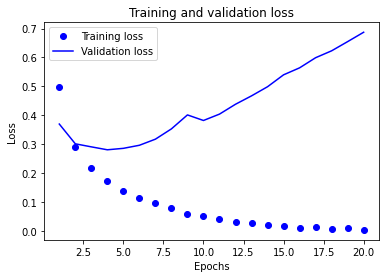

In [18]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

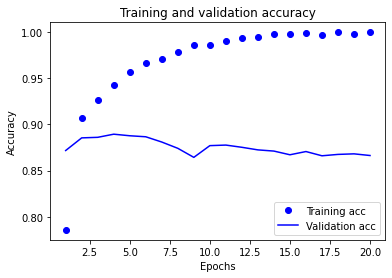

In [19]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512) # 과대적합 방지위해 4번째 에포크 동안만 훈련
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4540 - accuracy: 0.8219
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2634 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2035 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2926 - accuracy: 0.8850


In [21]:
results # 최종 결과

[0.29262271523475647, 0.8850399851799011]

### Using a trained model to generate predictions on new data

In [22]:
model.predict(x_test) # 어떤 리뷰가 긍정인 확률

array([[0.18744417],
       [0.9998542 ],
       [0.89944124],
       ...,
       [0.09864007],
       [0.06308533],
       [0.46444398]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example 다중분류

### The Reuters dataset

**Loading the Reuters dataset**

46개의 토픽

In [23]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [24]:
len(train_data) # 8982 개의 훈련샘플

8982

In [25]:
len(test_data)

2246

In [26]:
train_data[10] # 각 샘플은 정수 리스트 (단어 인덱스)

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [27]:
# 로이터 데이터셋을 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [28]:
train_labels[10] # 레이블은 토픽의 인덱스로 0과 45 사이의 정수

3

### Preparing the data

**Encoding the input data**

In [29]:
x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [30]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [31]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
y_test = to_one_hot(test_labels)

In [32]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
from tensorflow.keras.utils import to_categorical # 위에 꺼랑 같음
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [34]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # 출력 클래스 개수 46개
])

**Compiling the model**

In [35]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # softmax는 "categorical_crossentropy
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [36]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 2.7601 - accuracy: 0.4901 - val_loss: 1.8225 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4869 - accuracy: 0.7010 - val_loss: 1.3358 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0858 - accuracy: 0.7670 - val_loss: 1.1408 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8510 - accuracy: 0.8203 - val_loss: 1.0382 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6790 - accuracy: 0.8582 - val_loss: 0.9705 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5454 - accuracy: 0.8877 - val_loss: 0.9211 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4359 - accuracy: 0.9136 - val_loss: 0.9015 - val_accuracy: 0.8200
Epoch 8/20
16

**Plotting the training and validation loss**

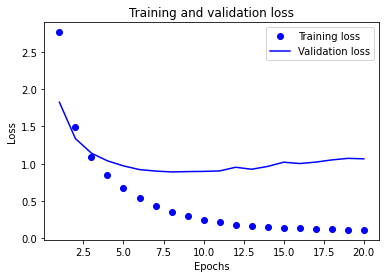

In [38]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

9번째 이후 과대적합 시작

**Plotting the training and validation accuracy**

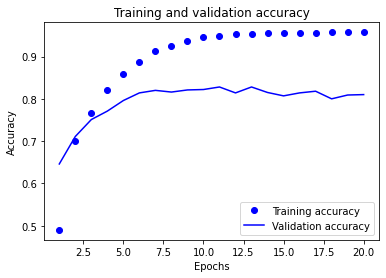

In [39]:
plt.clf() # 그래프 초기화
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [40]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9, # epochs 9
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5710 - accuracy: 0.5508
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3531 - accuracy: 0.7256
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9992 - accuracy: 0.7866
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7818 - accuracy: 0.8283
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6215 - accuracy: 0.8657
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4997 - accuracy: 0.8948
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3995 - accuracy: 0.9187
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3270 - accuracy: 0.9301
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9293 - accuracy: 0.8001


In [41]:
results

[0.9292574524879456, 0.8000890612602234]

In [42]:
# 무작위로 분류하면 정확도 18%
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19634906500445237

### Generating predictions on new data

In [43]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [44]:
predictions[0] #8.66002977e-01 가장큼

array([3.0728112e-04, 1.2914700e-03, 6.5918131e-05, 5.2007669e-01,
       4.2203885e-01, 1.7512333e-05, 1.4362208e-05, 4.4344465e-04,
       1.8161213e-02, 7.8989127e-05, 7.6822478e-05, 2.2515068e-03,
       1.4083147e-04, 5.4295035e-04, 7.7989993e-05, 2.5608189e-05,
       4.5789932e-03, 3.2177046e-03, 2.8912499e-04, 6.3005071e-03,
       4.5461673e-03, 2.2477382e-03, 9.4299839e-06, 7.0280723e-05,
       1.3330351e-06, 4.4452798e-04, 6.6764296e-06, 2.1018398e-04,
       1.4441181e-03, 2.0600839e-03, 1.2441338e-03, 1.2755710e-04,
       1.2909516e-04, 1.6406253e-05, 2.7130747e-03, 3.7674890e-05,
       1.0823447e-03, 5.1695073e-04, 1.7193091e-04, 1.1058213e-03,
       2.5424673e-04, 7.0526463e-04, 7.3067989e-05, 1.6284690e-04,
       1.9469378e-04, 4.2655799e-04], dtype=float32)

In [45]:
predictions[0].shape # predictions의 각 항목은 길이가 46인 벡터

(46,)

In [46]:
np.sum(predictions[0]) # 이 벡터의원소 합은 1

0.99999994

In [47]:
np.argmax(predictions[0]) # 가장 큰 값이 예측 클래스 즉 가장 확률이 높은 클래스

3

### A different way to handle the labels and the loss

In [48]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [49]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # 정수 레이블을 사용할 때
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [50]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"), # 이렇게 히든 유닛이 46 보다 많이 적어서는 안됨-> 검증 정확도 감소
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.9109 - accuracy: 0.3974 - val_loss: 2.0996 - val_accuracy: 0.5920
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.7428 - accuracy: 0.6300 - val_loss: 1.5632 - val_accuracy: 0.6490
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3931 - accuracy: 0.6797 - val_loss: 1.4281 - val_accuracy: 0.6750
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.2170 - accuracy: 0.7326 - val_loss: 1.3598 - val_accuracy: 0.6950
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0975 - accuracy: 0.7454 - val_loss: 1.3279 - val_accuracy: 0.6910
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 1.0035 - accuracy: 0.7491 - val_loss: 1.3134 - val_accuracy: 0.6890
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9237 - accuracy: 0.7585 - val_loss: 1.3097 - val_accuracy: 0.6950
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

* 레이블을 범주형 인코딩(원-핫 인코딩)으로 인코딩하고 categorial_crossentropy 손실 함수 사용
* 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수 사용

## Predicting house prices: A regression example

### The Boston Housing Price dataset 보스턴 주택 가격 데이터 셋

**Loading the Boston housing dataset**

In [51]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [52]:
train_data.shape # 404개의 훈련 샘플, 13개 특성

(404, 13)

In [53]:
test_data.shape

(102, 13)

In [54]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [55]:
# 상이한 스케일 가진 값 정규화
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

회귀는 활성화 함수 x

In [56]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # regression problem
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [57]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # prepare the validation data
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( # prepare training data: data from all other partitions
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, # builds the Keras model
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # evaluates the model on the validation data
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [58]:
all_scores

[2.006524085998535, 2.50177001953125, 2.505335807800293, 2.3381142616271973]

In [59]:
np.mean(all_scores)

2.337936043739319

**Saving the validation logs at each fold**

In [60]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [61]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

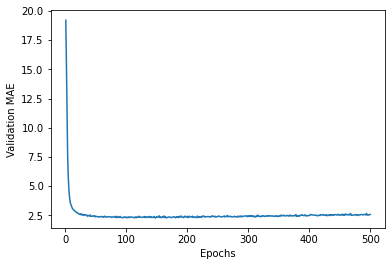

In [62]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

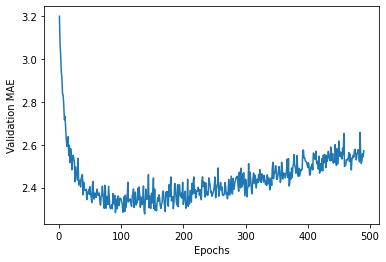

In [63]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

validation MAE stops improving after 120-140 epochs

**Training the final model**

In [64]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 14.6551 - mae: 2.4998


In [65]:
test_mae_score

2.499751091003418

### Generating predictions on new data

In [66]:
predictions = model.predict(test_data)
predictions[0]

array([7.5379853], dtype=float32)

### Wrapping up

## Summary